In [1]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,ridge_regression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv(r"../input/ann-car-sales-price-prediction/car_purchasing.csv",encoding='latin-1')
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [3]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [4]:
data = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isnull().sum(),
    'NullPercent':df.isnull().sum() / len(df),
    'Duplicated' :df.duplicated().sum(),
    'NaNN':df.isna().sum(),
    'Type':df.dtypes.values
})
data

,Unique,Null,NullPercent,Duplicated,NaNN,Type
customer name,498,0,0.0,0,0,object
customer e-mail,500,0,0.0,0,0,object
country,211,0,0.0,0,0,object
gender,2,0,0.0,0,0,int64
age,500,0,0.0,0,0,float64
annual Salary,500,0,0.0,0,0,float64
credit card debt,500,0,0.0,0,0,float64
net worth,500,0,0.0,0,0,float64
car purchase amount,500,0,0.0,0,0,float64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [6]:
df=df.select_dtypes(exclude='O')
df

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [7]:
### Univariate Analysis 

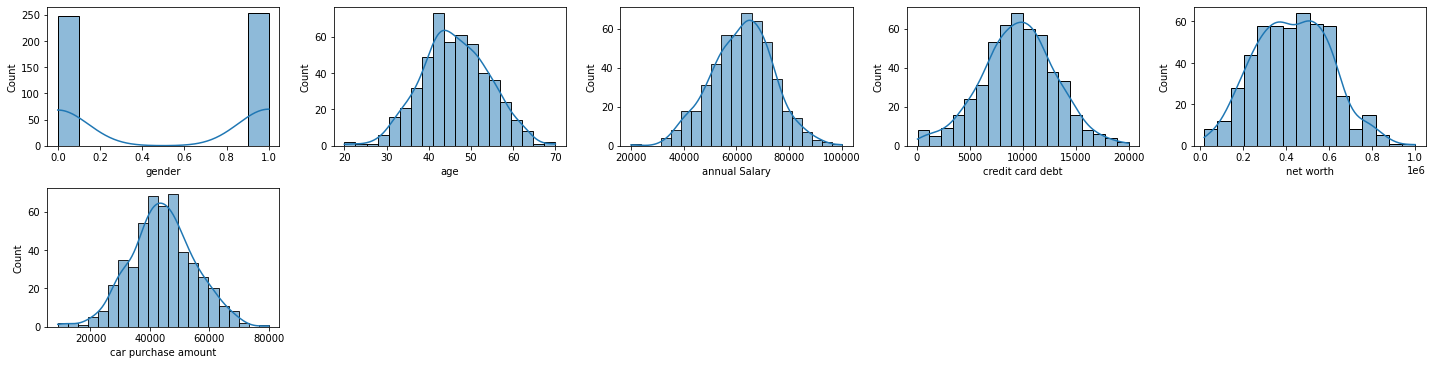

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,50))
for i, col in enumerate(df.columns):
    axes = plt.subplot(20,5, i + 1)
    sns.histplot(data=df,x=col,kde=True)
plt.tight_layout()
plt.show()

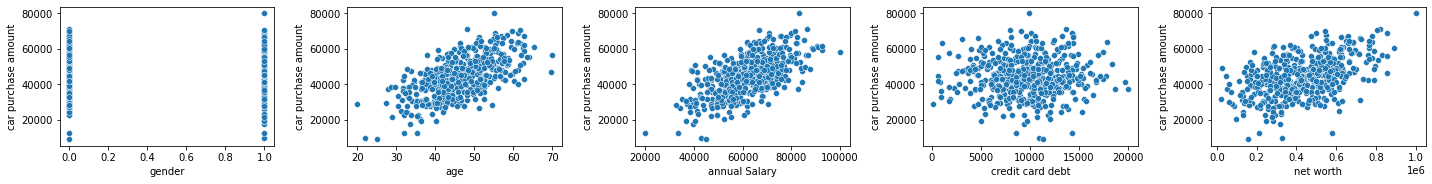

In [9]:
# Bivariate Analysis With Respect to Target
import matplotlib.pyplot as plt
plt.figure(figsize=(20,50))
for i, col in enumerate(df.columns):
    if col!='car purchase amount':
        axes = plt.subplot(20,5, i + 1)
        sns.scatterplot(data=df,x=col,y='car purchase amount')
plt.tight_layout()
plt.show()

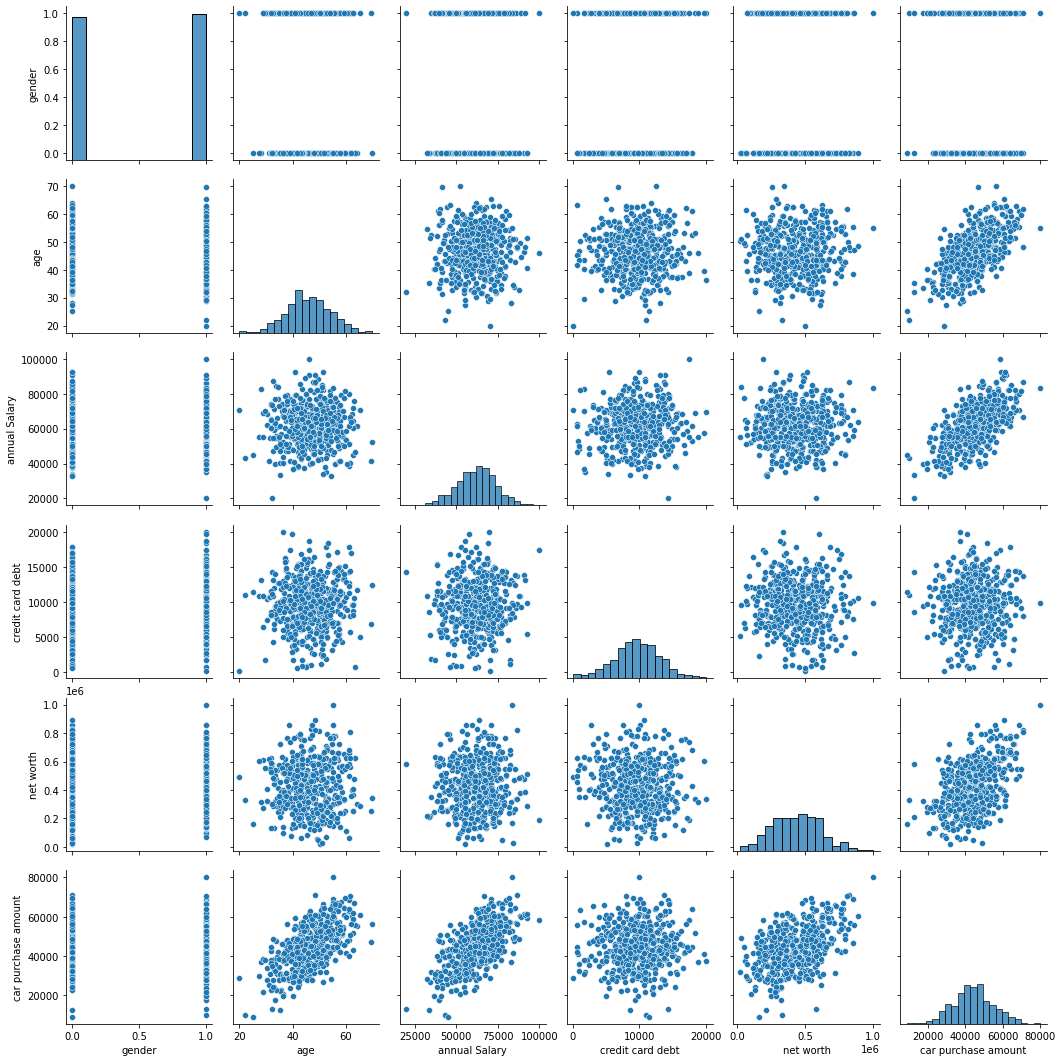

In [10]:
# Multivariate Analysis
sns.pairplot(data=df)

In [11]:
# Transforming the Data to follow Normal Distribution
import numpy as np
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
for i in df.columns:
    df[i]=pt.fit_transform(df[i].to_numpy().reshape(-1,1))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

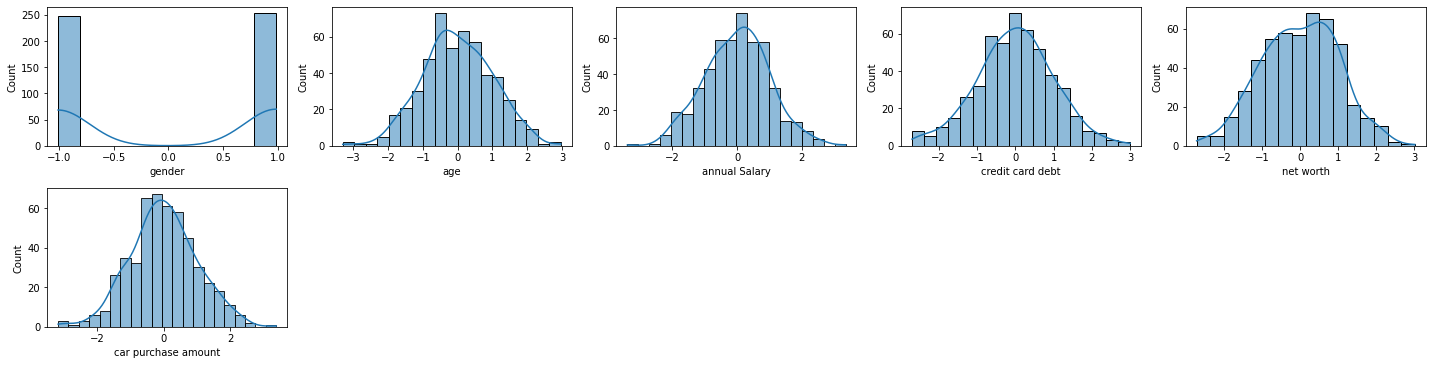

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,50))
for i, col in enumerate(df.columns):
    axes = plt.subplot(20,5, i + 1)
    sns.histplot(data=df,x=col,kde=True)
plt.tight_layout()
plt.show()

In [13]:
df

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,-1.012073,-0.549630,0.044742,0.573066,-1.110273,-0.829804
1,-1.012073,-0.672909,0.375839,-0.012751,0.593983,0.077110
2,0.988071,-0.386204,-0.721609,0.443763,1.173132,-0.126745
3,0.988071,1.507312,1.493692,1.385684,0.690286,2.182470
4,0.988071,1.387638,-0.219313,-1.219004,0.753935,1.090386
...,...,...,...,...,...,...
495,-1.012073,-0.598530,0.837624,-0.751548,0.652494,0.430879
496,0.988071,-1.078946,-0.532716,0.772494,-0.371728,-1.180733
497,0.988071,0.966193,0.570708,0.285842,1.830515,1.870464
498,0.988071,1.618399,-1.054782,1.266350,-0.505205,0.107566


In [14]:
# Correlation
pd.DataFrame(df.corr().reset_index()[['index','car purchase amount']]).sort_values(by='car purchase amount',ascending=False)

,index,car purchase amount
5,car purchase amount,1.000000
1,age,0.632564
2,annual Salary,0.616806
4,net worth,0.483886
3,credit card debt,0.029266
0,gender,-0.065928


### Model Bilding

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('car purchase amount',axis=1),df['car purchase amount'], test_size=0.3, random_state=42)

In [16]:
model=LinearRegression(fit_intercept=True).fit(X_train,y_train)
y_pred=model.predict(X_test)
print('R2 Score',model.score(X_train,y_train))
print('MSE : ',mean_squared_error(y_pred,y_test))
print('MAE : ',mean_absolute_error(y_pred,y_test))


R2 Score 0.9990476580755537
MSE :  0.0008446562689194583
MAE :  0.01977930427347498


In [17]:
pd.DataFrame({'Predicted':y_pred,'Actual':y_test,'Difference':y_test-y_pred}).sort_values(by='Difference',ascending=False)

,Predicted,Actual,Difference
155,-1.316197,-1.149145,0.167053
227,-1.511214,-1.407526,0.103688
335,-0.505352,-0.406352,0.099000
231,-0.085515,0.013483,0.098998
104,1.422925,1.520402,0.097477
...,...,...,...
423,0.532949,0.493376,-0.039573
56,0.332908,0.288599,-0.044309
317,1.498189,1.453821,-0.044368
148,1.544776,1.497744,-0.047032
